# Proyek Analisis Data: Bike Share Dataset
- **Nama:** Rehand Naifisurya Hermansyah
- **Email:** rehandnaifisuryahermansyah@gmail.com
- **ID Dicoding:** MC313D5Y0327 (CC x DBS Foundation)

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana ketika bersepeda pada weekday dan weekend?
- Pertanyaan 2: Kategori penjualan yang tertinggi berdasarkan musim apa?
- Pertanyaan 3 : Berdasarkan suhu, rentang berapa yang cukup untuk melakukan aktivitas bersepeda?
- Pertanyaan 4 : Cuaca seperti apa yang cocok untuk bersepeda?

Pertanyaan utama : Apakah ada tren penggunaan sepeda dalam sehari, hari kerja vs. akhir pekan, atau musim tertentu?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

Pada data wrangling ini, dilakukan pengumpulan data. Data yang saya ambil adalah dataset Bike Share Dataset yang terdiri dua dataset yaitu day.csv dan hour.csv. Selain itu, dilakukan assesing data singkat dan melakukan cleaning data. Berikut cleaning data yang dilakukan
- Menghapus kolom working day karena sudah diwakilkan oleh kolom lainnya.
- Mengubah nama kolom guna mempermudah penyebutan dan arti.
- Melakukan beberapa konversi dari data numerik menjadi kategorikal.

### Gathering Data

In [2]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
hour.info()
hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
day.info()
day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day.isna().sum()



,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Duplikasi data day: ", day.duplicated().sum())

Duplikasi data day:  0


In [9]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Duplikasi data hour: ", hour.duplicated().sum())

Duplikasi data hour:  0


### Cleaning Data

In [11]:
hour.drop(['workingday'], axis = 1, inplace= True)
day.drop(['workingday'], axis = 1, inplace= True)


In [12]:
hour[['season', 'mnth', 'holiday', 'weekday', 'weathersit']] = hour[['season', 'mnth', 'holiday', 'weekday', 'weathersit']].astype('category')
day[['season', 'mnth', 'holiday', 'weekday', 'weathersit']] = day[['season', 'mnth', 'holiday', 'weekday', 'weathersit']].astype('category')

In [13]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
day['dteday'] = pd.to_datetime(day['dteday'])

In [14]:
hour.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'week', 'weathersit':'situation_of_weather','windspeed':'speed_of_wind','cnt':'count','hum':'humidity'},inplace=True)
day.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'week', 'weathersit':'situation_of_weather','windspeed':'speed_of_wind','cnt':'count','hum':'humidity'},inplace=True)


In [15]:
hour.week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
hour.year.replace((0,1), ('2011','2012'), inplace=True)

day.week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
day.year.replace((0,1), ('2011','2012'), inplace=True)


<ipython-input-15-641114a4ed61>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
<ipython-input-15-641114a4ed61>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour.week.replace((0,1,2,3,4,5,6

In [16]:
day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day.situation_of_weather.replace((1,2,3,4), ('Clear','Mist_Cloudy','Light_Rain','Heavy_Rain'), inplace=True)
hour.situation_of_weather.replace((1,2,3,4), ('Clear','Mist_Cloudy','Light_Rain','Heavy_Rain'), inplace=True)

<ipython-input-16-232bf10d0354>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-16-232bf10d0354>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace

In [17]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(week):
    if week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour["category_days"] = hour["week"].apply(get_category_days)
day["category_days"] = day["week"].apply(get_category_days)

In [18]:
day.head()

,instant,dteday,season,year,month,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
0,1,2011-01-01,Spring,2011,January,0,Saturday,Mist_Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,weekend
1,2,2011-01-02,Spring,2011,January,0,Sunday,Mist_Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,weekend
2,3,2011-01-03,Spring,2011,January,0,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,weekdays
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,weekdays
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,weekdays


In [19]:
hour.head()

,instant,dteday,season,year,month,hours,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,Clear,0.24,0.2879,0.81,0.0,3,13,16,weekend
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,Clear,0.22,0.2727,0.80,0.0,8,32,40,weekend
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,Clear,0.22,0.2727,0.80,0.0,5,27,32,weekend
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,Clear,0.24,0.2879,0.75,0.0,3,10,13,weekend
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,Clear,0.24,0.2879,0.75,0.0,0,1,1,weekend


**Insight Data Wrangling:**
- Dataset terbagi menjadi dua yaitu day mewakili berdasarkan hari dan hour yaitu dataset per jam. Selain itu, yang membedakan adalah pada dataset hour.csv terdapat satu kolom yaitu 'hr' atau jam.
- Dataset hour.csv memiliki jumlah data sebanyak 17.379 data dan tidak memiliki nilai NULL serta memiliki 0 data duplikasi.
- Dataset day.csv memiliki jumlah data sebanyak 731 data dan tidak memiliki nilai NULL serta memiliki 0 data duplikasi.
- Cleaning data telah dilakukan drop kolom working data dan instant. Mengubah nama kolom agar lebih dapat dipahami dan menambah kolom baru 'categori_days' yang isinya pelabelan weekend dan weekday.


## Exploratory Data Analysis (EDA)

Eksplor data day

In [20]:
day.sample(5)

,instant,dteday,season,year,month,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
528,529,2012-06-12,Summer,2012,June,0,Tuesday,Mist_Cloudy,0.653333,0.597875,0.833333,0.214546,477,4495,4972,weekdays
404,405,2012-02-09,Spring,2012,February,0,Thursday,Clear,0.265000,0.261988,0.562083,0.194037,163,3667,3830,weekdays
655,656,2012-10-17,Winter,2012,October,0,Wednesday,Clear,0.455833,0.450108,0.692917,0.101371,979,6482,7461,weekdays
86,87,2011-03-28,Summer,2011,March,0,Monday,Clear,0.264348,0.257574,0.302174,0.212204,222,1806,2028,weekdays
448,449,2012-03-24,Summer,2012,March,0,Saturday,Mist_Cloudy,0.502500,0.486733,0.885417,0.192783,1033,2339,3372,weekend


In [21]:
day.describe(include="all")

,instant,dteday,season,year,month,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012,January,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


Eksplor data hour

In [22]:
hour.sample(5)

,instant,dteday,season,year,month,hours,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
3771,3772,2011-06-11,Summer,2011,June,1,0,Saturday,Clear,0.70,0.6667,0.79,0.0896,10,67,77,weekend
7680,7681,2011-11-21,Winter,2011,November,15,0,Monday,Light_Rain,0.44,0.4394,0.94,0.2239,15,93,108,weekdays
11715,11716,2012-05-08,Summer,2012,May,8,0,Tuesday,Mist_Cloudy,0.54,0.5152,0.73,0.2985,36,605,641,weekdays
1123,1124,2011-02-19,Spring,2011,February,13,0,Saturday,Clear,0.44,0.4394,0.16,0.6119,52,103,155,weekend
11539,11540,2012-05-01,Summer,2012,May,0,0,Tuesday,Mist_Cloudy,0.50,0.4848,0.59,0.1940,7,28,35,weekdays


In [23]:
hour.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,week,situation_of_weather,temp,atemp,humidity,speed_of_wind,casual,registered,count,category_days
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


### Eksplorasi Variabel Bivariate

#### Jumlah peminjaman sesuai weekend dan weekday

In [24]:
peminjaman_kategori_day = day.groupby('category_days')['count'].sum()
peminjaman_kategori_day_hour = hour.groupby('category_days')['count'].sum()
print(peminjaman_kategori_day)
print(peminjaman_kategori_day_hour)

category_days
weekdays    2370845
weekend      921834
Name: count, dtype: int64
category_days
weekdays    2370845
weekend      921834
Name: count, dtype: int64


#### Jumlah peminjaman sesuai season




In [26]:
day.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

<ipython-input-26-8cbc537518bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="season").agg({


,casual,registered,count
season,,,
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


#### Jumlah peminjaman sesuai tahun


In [27]:
day.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


#### Jumlah peminjaman sesuai bulan

In [28]:
peminjaman_per_bulan = day.groupby('month')['count'].sum()
print(peminjaman_per_bulan)

month
January      134933
February     151352
March        228920
April        269094
May          331686
June         346342
July         344948
August       351194
September    345991
October      322352
November     254831
December     211036
Name: count, dtype: int64


<ipython-input-28-54789f7ef652>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peminjaman_per_bulan = day.groupby('month')['count'].sum()


#### Jumlah peminjaman sesuai situasi cuaca

In [29]:
peminjaman_per_bulan = day.groupby('situation_of_weather')['count'].sum()
print(peminjaman_per_bulan)

situation_of_weather
Clear          2257952
Mist_Cloudy     996858
Light_Rain       37869
Name: count, dtype: int64


<ipython-input-29-1db1f2db60c7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peminjaman_per_bulan = day.groupby('situation_of_weather')['count'].sum()


In [30]:
day.groupby(by="category_days").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})


,casual,registered,count
category_days,,,
weekdays,325644,2045201,2370845
weekend,294373,627461,921834


**Insight Exploratory Data Analysis (EDA):**
- Pada Exploratory Data Analysis dilakukan eksplorasi bivariate dimana kolom 'count' atau jumlah keseluruhan peminjaman sepeda dibandingkan dengan jumlah beberapa kolom.
- pada kolom antara count dan category days terdiri dari jumlah yang bersepeda yaitu weekdays 2370845 dan weekend 921834
- Jumlah count pada musim yaitu Spring 471348, Summer 918589, Fall 1061129, Winter 841613
- 2012 memiliki jumlah lebih tinggi daripada tahun 2011
- Peminjaman tertinggi terdapat pada bulan Agustus (Gabungan 2011 & 2012)
- Peminjaman sepeda banyak dilakukan dikala cuaca cerah atau clear

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana ketika bersepeda pada weekday dan weekend?

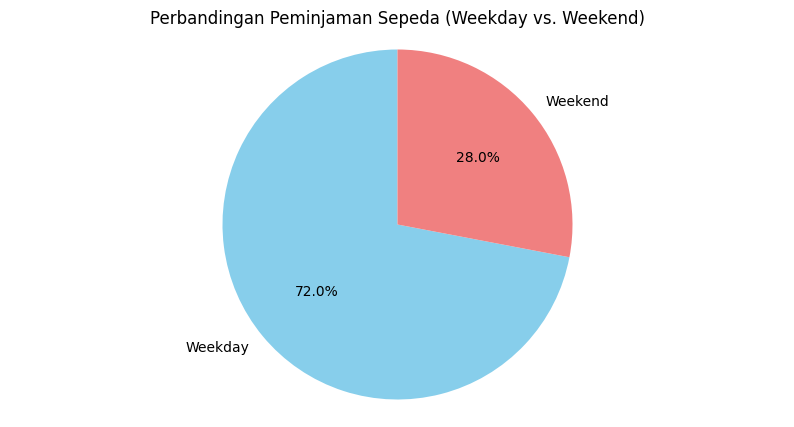

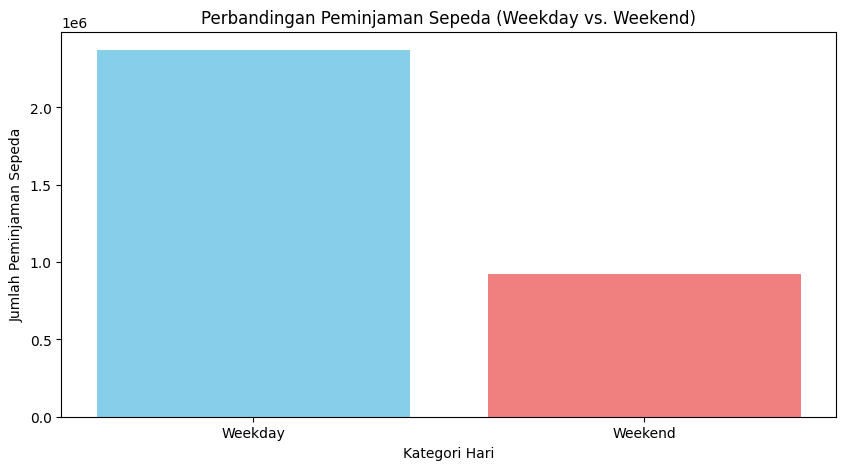

In [31]:
weekday_count = day[day['category_days'] == 'weekdays']['count'].sum()
weekend_count = day[day['category_days'] == 'weekend']['count'].sum()

labels = ['Weekday', 'Weekend']
sizes = [weekday_count, weekend_count]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda (Weekday vs. Weekend)')
plt.axis('equal')
plt.show()


plt.figure(figsize=(10,5))
plt.bar(labels, sizes, color=colors)
plt.title('Perbandingan Peminjaman Sepeda (Weekday vs. Weekend)')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


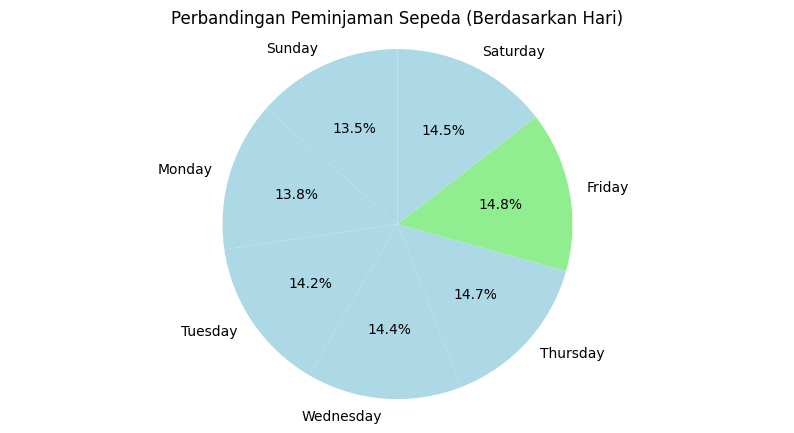

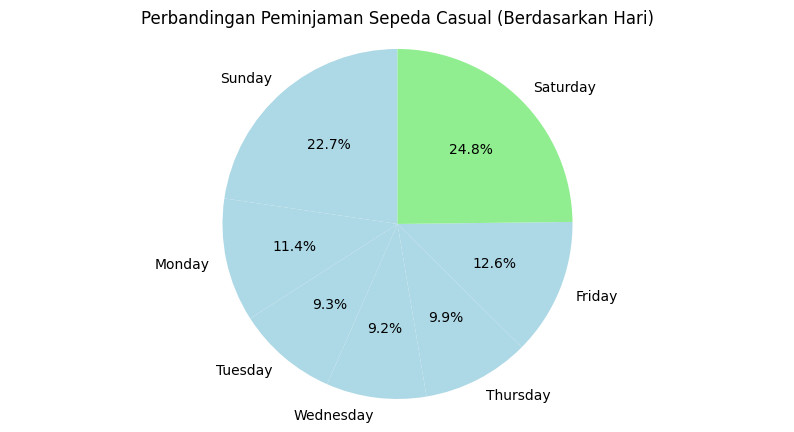

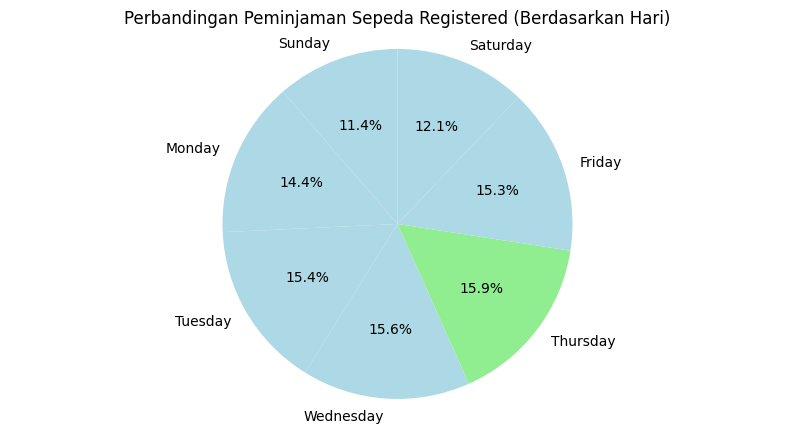

In [32]:
sunday_count = day[day['week'] == 'Sunday']['count'].sum()
monday_count = day[day['week'] == 'Monday']['count'].sum()
tuesday_count = day[day['week'] == 'Tuesday']['count'].sum()
wednesday_count = day[day['week'] == 'Wednesday']['count'].sum()
thursday_count = day[day['week'] == 'Thursday']['count'].sum()
friday_count = day[day['week'] == 'Friday']['count'].sum()
saturday_count = day[day['week'] == 'Saturday']['count'].sum()

labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sizes = [sunday_count, monday_count, tuesday_count, wednesday_count, thursday_count, friday_count, saturday_count]
colors = ['lightblue', 'lightblue','lightblue','lightblue','lightblue','lightgreen','lightblue']

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda (Berdasarkan Hari)')
plt.axis('equal')
plt.show()

sunday_count = day[day['week'] == 'Sunday']['casual'].sum()
monday_count = day[day['week'] == 'Monday']['casual'].sum()
tuesday_count = day[day['week'] == 'Tuesday']['casual'].sum()
wednesday_count = day[day['week'] == 'Wednesday']['casual'].sum()
thursday_count = day[day['week'] == 'Thursday']['casual'].sum()
friday_count = day[day['week'] == 'Friday']['casual'].sum()
saturday_count = day[day['week'] == 'Saturday']['casual'].sum()

labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sizes = [sunday_count, monday_count, tuesday_count, wednesday_count, thursday_count, friday_count, saturday_count]
colors = ['lightblue', 'lightblue','lightblue','lightblue','lightblue', 'lightblue','lightgreen']

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda Casual (Berdasarkan Hari)')
plt.axis('equal')
plt.show()

sunday_count = day[day['week'] == 'Sunday']['registered'].sum()
monday_count = day[day['week'] == 'Monday']['registered'].sum()
tuesday_count = day[day['week'] == 'Tuesday']['registered'].sum()
wednesday_count = day[day['week'] == 'Wednesday']['registered'].sum()
thursday_count = day[day['week'] == 'Thursday']['registered'].sum()
friday_count = day[day['week'] == 'Friday']['registered'].sum()
saturday_count = day[day['week'] == 'Saturday']['registered'].sum()

labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sizes = [sunday_count, monday_count, tuesday_count, wednesday_count, thursday_count, friday_count, saturday_count]
colors = ['lightblue', 'lightblue','lightblue','lightblue','lightgreen','lightblue', 'lightblue']

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda Registered (Berdasarkan Hari)')
plt.axis('equal')
plt.show()

### Pertanyaan 2: Kategori penjualan yang tertinggi berdasarkan musim apa?

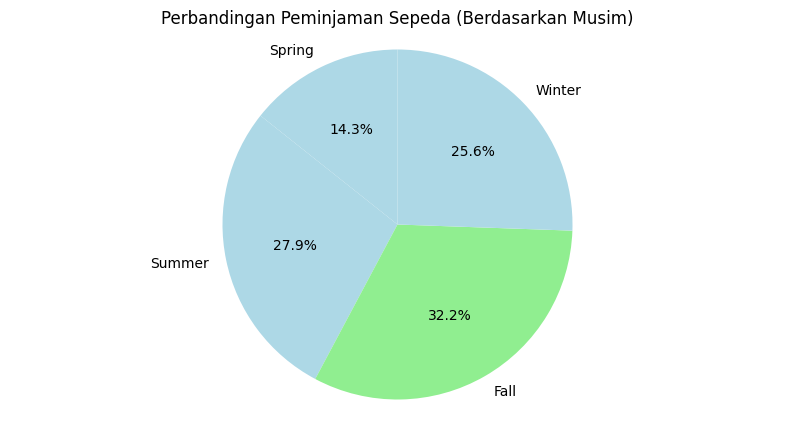

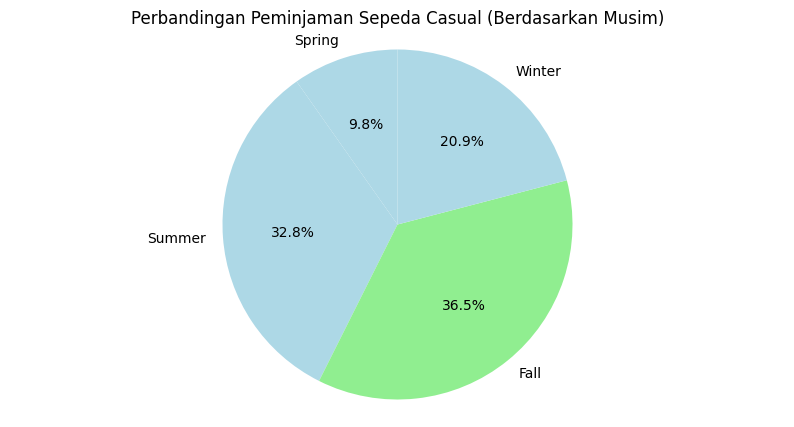

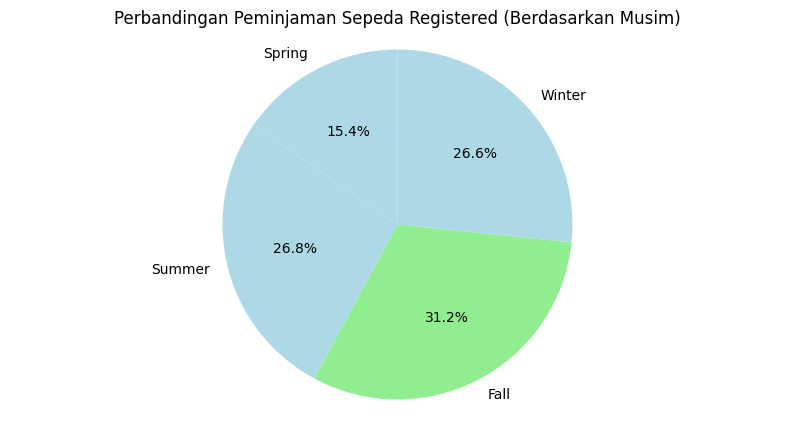

In [33]:
spring_count_cr = day[day['season'] == 'Spring']['count'].sum()
summer_count_cr = day[day['season'] == 'Summer']['count'].sum()
fall_count_cr = day[day['season'] == 'Fall']['count'].sum()
winter_count_cr = day[day['season'] == 'Winter']['count'].sum()

spring_count_casual = day[day['season'] == 'Spring']['casual'].sum()
summer_count_casual = day[day['season'] == 'Summer']['casual'].sum()
fall_count_casual = day[day['season'] == 'Fall']['casual'].sum()
winter_count_casual = day[day['season'] == 'Winter']['casual'].sum()

spring_count_registered = day[day['season'] == 'Spring']['registered'].sum()
summer_count_registered = day[day['season'] == 'Summer']['registered'].sum()
fall_count_registered = day[day['season'] == 'Fall']['registered'].sum()
winter_count_registered = day[day['season'] == 'Winter']['registered'].sum()


labels = ['Spring', 'Summer', 'Fall', 'Winter']
sizes_cr = [spring_count_cr, summer_count_cr, fall_count_cr, winter_count_cr]
sizes_casual = [spring_count_casual, summer_count_casual, fall_count_casual, winter_count_casual]
sizes_registered = [spring_count_registered, summer_count_registered, fall_count_registered, winter_count_registered]
colors = ['lightblue', 'lightblue', 'lightgreen', 'lightblue']


plt.figure(figsize=(10,5))
plt.pie(sizes_cr, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda (Berdasarkan Musim)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,5))
plt.pie(sizes_casual, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda Casual (Berdasarkan Musim)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,5))
plt.pie(sizes_registered, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Peminjaman Sepeda Registered (Berdasarkan Musim)')
plt.axis('equal')
plt.show()


<ipython-input-34-6a129de22b01>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_counts = day['count'].groupby(day['season']).max()


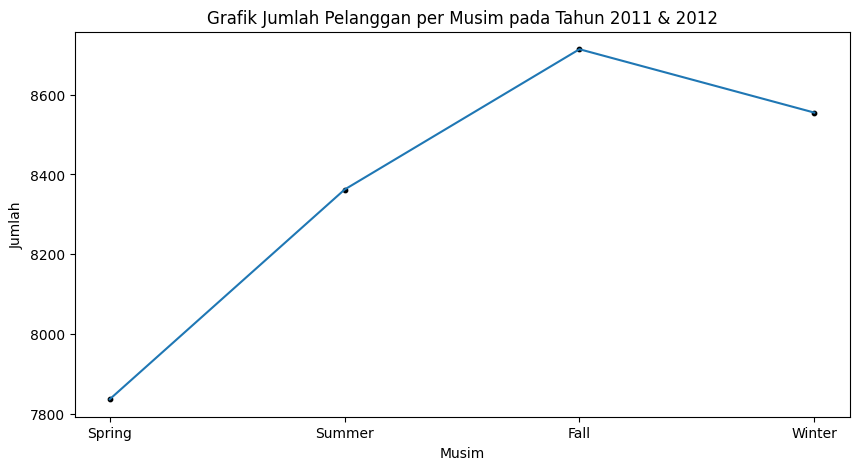

In [34]:
plt.figure(figsize=(10, 5))
month_counts = day['count'].groupby(day['season']).max()
plt.scatter(month_counts.index, month_counts.values, c = '#000000', s=10, marker='o')
plt.plot(month_counts.index, month_counts.values)
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pelanggan per Musim pada Tahun 2011 & 2012')
plt.show()

<ipython-input-35-365560b6909f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_counts = day['count'].groupby(day['month']).max()


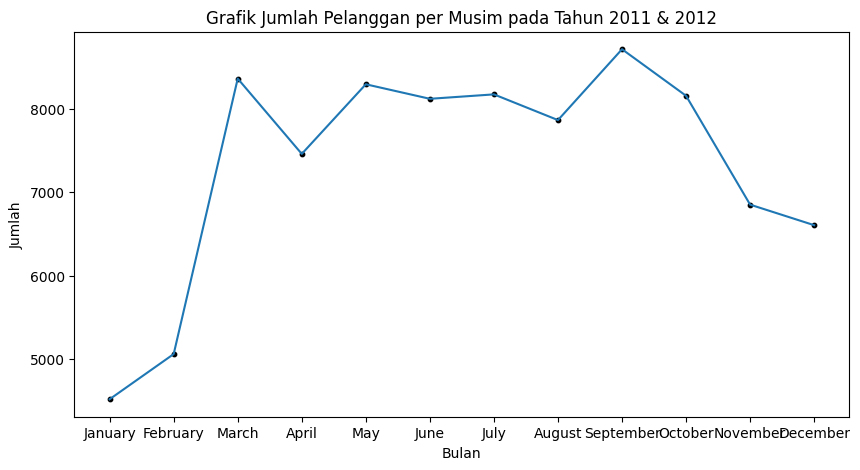

In [35]:
plt.figure(figsize=(10, 5))
month_counts = day['count'].groupby(day['month']).max()
plt.scatter(month_counts.index, month_counts.values, c = '#000000', s=10, marker='o')
plt.plot(month_counts.index, month_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pelanggan per Musim pada Tahun 2011 & 2012')
plt.show()

### Pertanyaan 3 : Bagaimana hubungan suhu dengan jumlah bersepeda


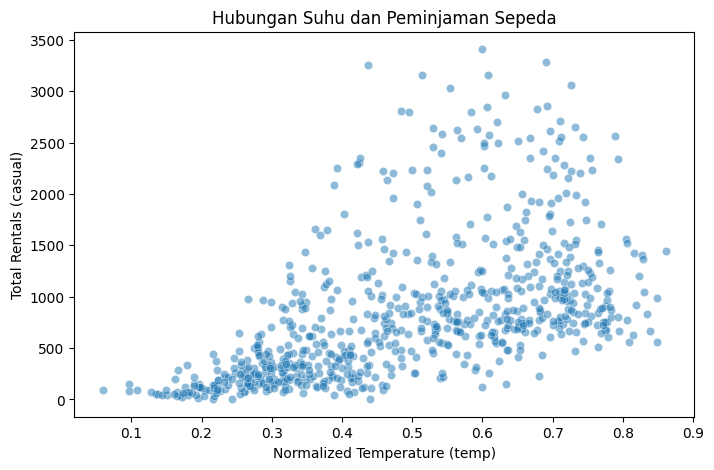

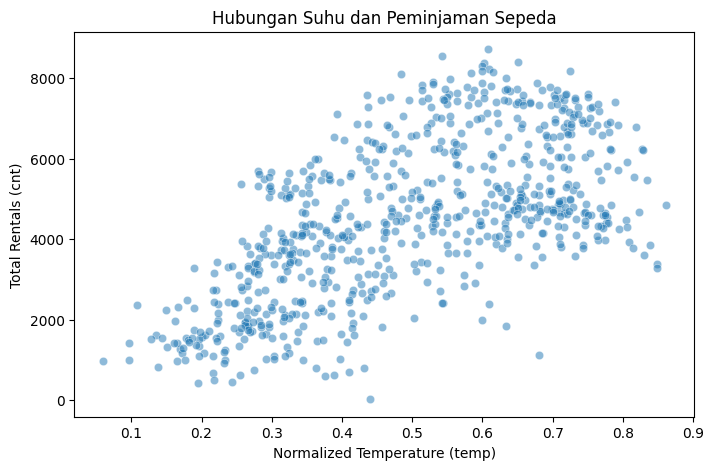

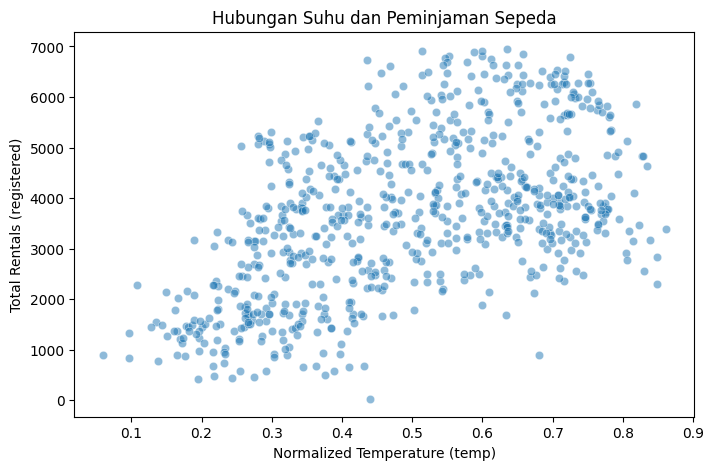

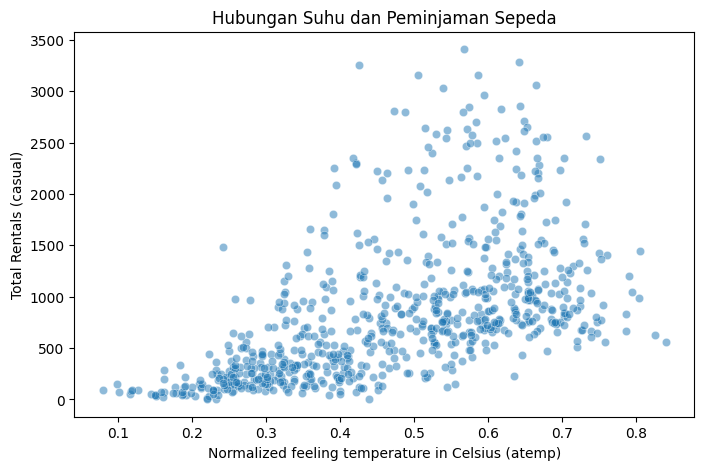

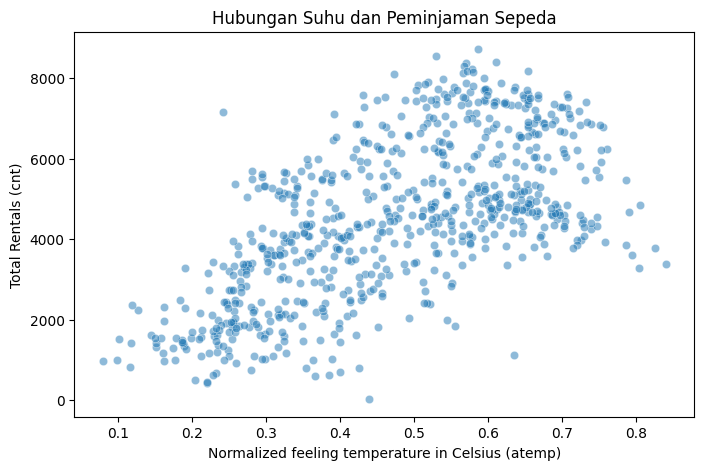

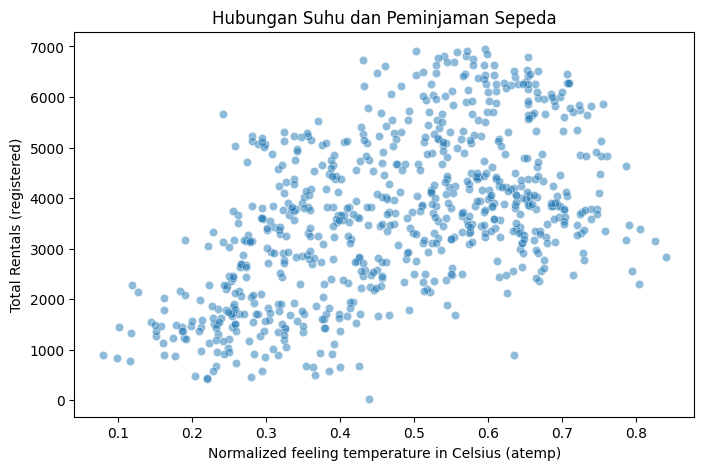

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day['temp'], y=day['casual'], alpha=0.5)
plt.xlabel("Normalized Temperature (temp)")
plt.ylabel("Total Rentals (casual)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x=day['temp'], y=day['count'], alpha=0.5)
plt.xlabel("Normalized Temperature (temp)")
plt.ylabel("Total Rentals (cnt)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=day['temp'], y=day['registered'], alpha=0.5)
plt.xlabel("Normalized Temperature (temp)")
plt.ylabel("Total Rentals (registered)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=day['atemp'], y=day['casual'], alpha=0.5)
plt.xlabel("Normalized feeling temperature in Celsius (atemp)")
plt.ylabel("Total Rentals (casual)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x=day['atemp'], y=day['count'], alpha=0.5)
plt.xlabel("Normalized feeling temperature in Celsius (atemp)")
plt.ylabel("Total Rentals (cnt)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=day['atemp'], y=day['registered'], alpha=0.5)
plt.xlabel("Normalized feeling temperature in Celsius (atemp)")
plt.ylabel("Total Rentals (registered)")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()

### Pertanyaan 4 : Bagaimana  Peminjaman Sepeda Registered berdasarkan Kondisi Cuaca


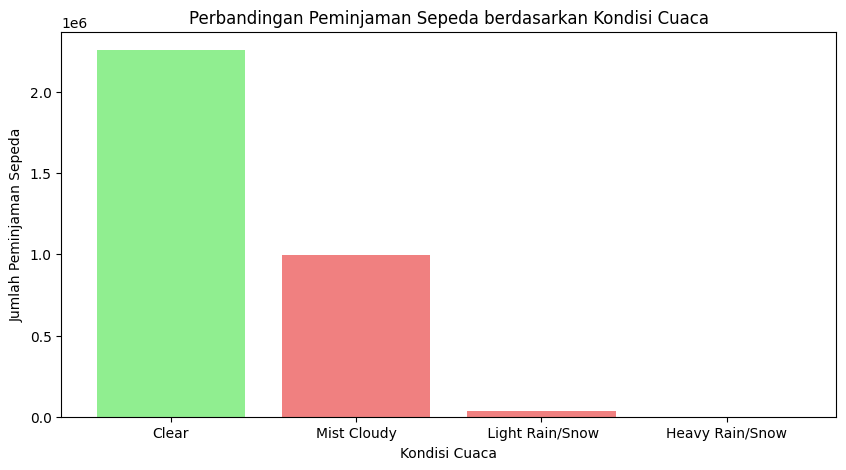

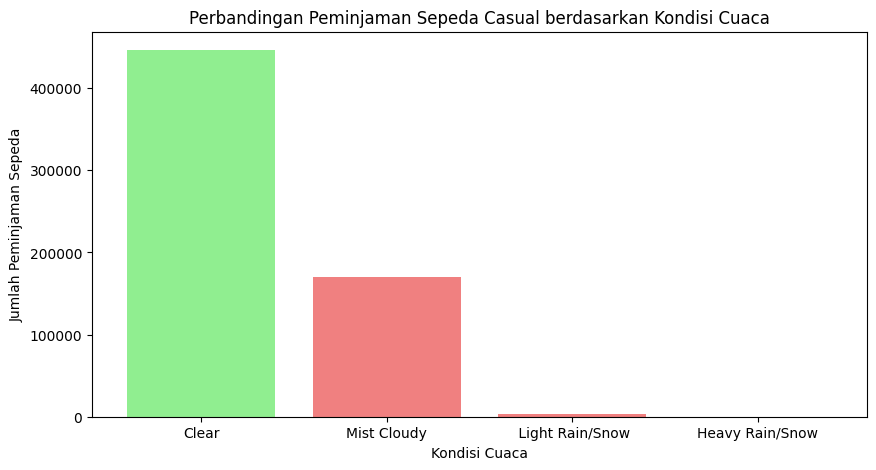

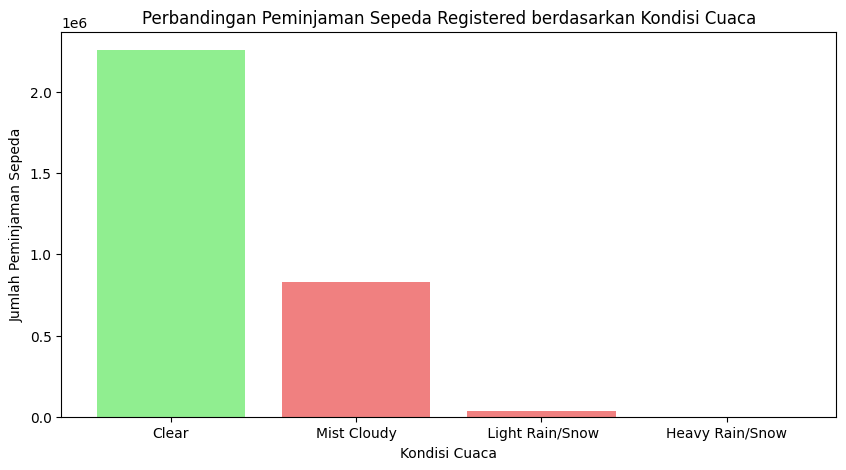

In [37]:
clear_count = day[day['situation_of_weather'] == 'Clear']['count'].sum()
mist_cloudy_count = day[day['situation_of_weather'] == 'Mist_Cloudy']['count'].sum()
light_rain_count = day[day['situation_of_weather'] == 'Light_Rain']['count'].sum()
Heavy_Rain_count = day[day['situation_of_weather'] == 'Heavy_Rain']['count'].sum()

clear_count_casual = day[day['situation_of_weather'] == 'Clear']['casual'].sum()
mist_cloudy_count_casual = day[day['situation_of_weather'] == 'Mist_Cloudy']['casual'].sum()
light_rain_count_casual = day[day['situation_of_weather'] == 'Light_Rain']['casual'].sum()
Heavy_Rain_count_casual = day[day['situation_of_weather'] == 'Heavy_Rain']['casual'].sum()

clear_count_registered = day[day['situation_of_weather'] == 'Clear']['count'].sum()
mist_cloudy_count_registered = day[day['situation_of_weather'] == 'Mist_Cloudy']['registered'].sum()
light_rain_count_registered = day[day['situation_of_weather'] == 'Light_Rain']['registered'].sum()
Heavy_Rain_count_registered = day[day['situation_of_weather'] == 'Heavy_Rain']['registered'].sum()


labels = ['Clear', 'Mist Cloudy', ' Light Rain/Snow', 'Heavy Rain/Snow']
sizes = [clear_count, mist_cloudy_count, light_rain_count, Heavy_Rain_count]
sizes_casual = [clear_count_casual, mist_cloudy_count_casual, light_rain_count_casual, Heavy_Rain_count_casual]
sizes_registered = [clear_count_registered, mist_cloudy_count_registered, light_rain_count_registered, Heavy_Rain_count_registered]
colors = ['lightgreen', 'lightcoral', 'lightcoral', 'lightcoral']


plt.figure(figsize=(10,5))
plt.bar(labels, sizes, color=colors)
plt.title('Perbandingan Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(labels, sizes_casual, color=colors)
plt.title('Perbandingan Peminjaman Sepeda Casual berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(labels, sizes_registered, color=colors)
plt.title('Perbandingan Peminjaman Sepeda Registered berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight Visualization & Explanatory Analysis:**
- Telah dibuat pie chart untuk pertanyaan 1 dan 2 karena lebih jelas dalam visualisasi
- Visualisasi pada pertanyaan 3 yang cocok adalah menggunakan scatterplot supaya mengetahui penyabaran data dan mendapatkan sebuah kesimpulan
- Telah dibuat bar chart agar mengetahui kondisi yang paling cocok untuk melakukan aktivitas bersepeda

## Analisis Lanjutan (Opsional)

In [38]:
rfm_df = hour.groupby('registered').agg({
    'dteday': lambda x: (max(hour['dteday']) - x.max()).days,
    'instant': 'nunique',
    'count': 'sum'
    }).reset_index()
rfm_df.columns = ['instant', 'Recency', 'Frequency', 'Monetary']

rfm_df.head(10)


,instant,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602
5,5,2,287,1840
6,6,6,266,1992
7,7,1,200,1787
8,8,0,190,1968
9,9,0,178,2057


In [41]:
rfm_df = day.groupby(by="registered", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "count": "sum"
})
rfm_df.columns = ["instant", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary
0,20,2012-10-29,1,22
1,416,2011-01-27,1,431
2,432,2012-12-26,1,441
3,451,2011-12-25,1,754
4,472,2011-01-26,1,506


In [42]:
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = pd.to_datetime(day["dteday"]).dt.date.max()  # Use 'dteday' instead of 'order_date'
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary,recency
0,20,2012-10-29,1,22,63
1,416,2011-01-27,1,431,704
2,432,2012-12-26,1,441,5
3,451,2011-12-25,1,754,372
4,472,2011-01-26,1,506,705


In [43]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,20,1,22,63
1,416,1,431,704
2,432,1,441,5
3,451,1,754,372
4,472,1,506,705


In [44]:
rfm_df.describe()

,instant,frequency,monetary,recency
count,679.000000,679.000000,679.000000,679.000000
mean,3649.804124,1.076583,4849.306333,359.539028
std,1573.666175,0.282262,2532.379196,212.183961
min,20.000000,1.000000,22.000000,0.000000
25%,2485.500000,1.000000,3199.000000,172.500000
50%,3643.000000,1.000000,4595.000000,358.000000
75%,4776.500000,1.000000,6417.000000,542.000000
max,6946.000000,3.000000,22373.000000,730.000000


In [45]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frequency,monetary,recency
145,2290,1,2729,0
58,1432,1,1796,1
36,1182,1,1341,2
163,2451,1,3095,3
111,1867,1,2114,4


In [46]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,instant,frequency,monetary,recency
634,6248,3,22373,153
95,1707,3,6653,364
513,4841,3,18780,21
266,3248,2,7809,15
297,3413,2,9151,477


<ipython-input-47-13685f880fb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-47-13685f880fb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-47-13685f880fb2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", a

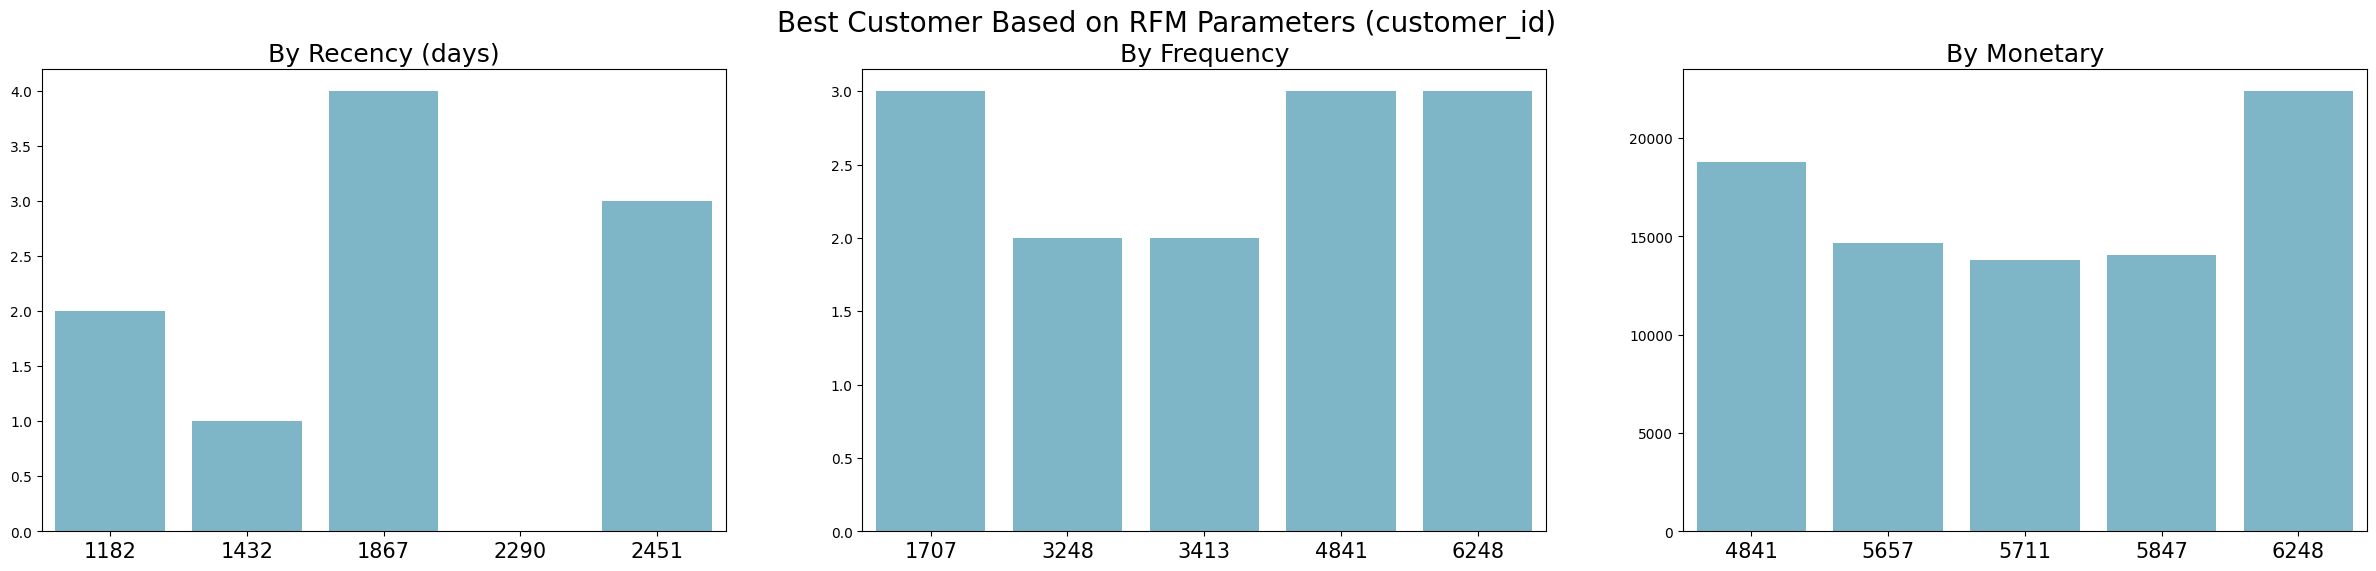

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [48]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()


,instant,frequency,monetary,recency,r_rank,f_rank,m_rank
0,20,1,22,63,616.0,315.5,1.0
1,416,1,431,704,23.0,315.5,2.0
2,432,1,441,5,674.0,315.5,3.0
3,451,1,754,372,326.0,315.5,9.0
4,472,1,506,705,22.0,315.5,4.0


In [49]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()


,instant,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,20,1,22,63,90.721649,46.533923,0.147275
1,416,1,431,704,3.387334,46.533923,0.294551
2,432,1,441,5,99.263623,46.533923,0.441826
3,451,1,754,372,48.011782,46.533923,1.325479
4,472,1,506,705,3.240059,46.533923,0.589102


In [50]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['instant', 'RFM_score']].head(7)

,instant,RFM_score
0,20,1.34
1,416,0.69
2,432,1.41
3,451,1.05
4,472,0.69
5,491,0.74
6,570,0.98


In [51]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['instant', 'RFM_score', 'customer_segment']].head(20)

,instant,RFM_score,customer_segment
0,20,1.34,lost customers
1,416,0.69,lost customers
2,432,1.41,lost customers
3,451,1.05,lost customers
4,472,0.69,lost customers
5,491,0.74,lost customers
6,570,0.98,lost customers
7,573,1.48,lost customers
8,577,0.75,lost customers
9,654,0.72,lost customers


In [52]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).instant.nunique()
customer_segment_df

,customer_segment,instant
0,High value customer,16
1,Low value customers,286
2,Medium value customer,203
3,Top customers,26
4,lost customers,148


In [53]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

<ipython-input-54-997b29a26547>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


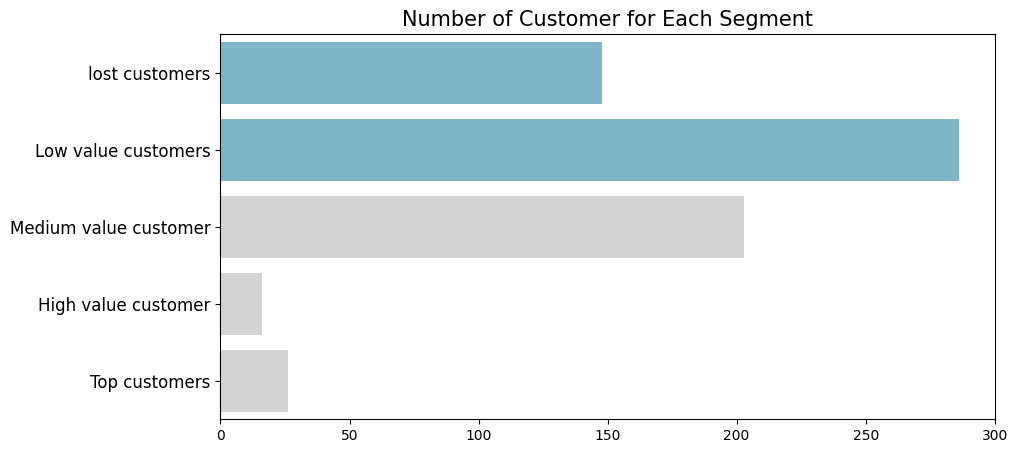

In [54]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="instant",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 Bagaimana ketika bersepeda pada weekday dan weekend?
1. Data yang ditunjukan relatif seimbang ketika jumlah casual & registered digabung (count)
2. Jenis peminjaman casual terjadi pada weekday
3. Jenis peminjaman registred terjadi pada weekend
4. kolom count merupakan penjumlahan casual dan registered

- Conclution Pertanyaan 2: Kategori penjualan apa yang tertinggi berdasarkan musim
1. Peminjaman sepeda tertinggi terdapat pada musim Fall
2. Dataset berasal dari portugal yaitu bagian utara bumi, peminjaman sepeda tertinggi adalah betul terjadi di bulan agustus termasuk pada musim Fall

- Conclution pertanyaan 3 Berdasarkan suhu, rentang berapa yang cukup untuk melakukan aktivitas bersepedah
1. Suhu terasa (atemp) memiliki pengaruh positif terhadap peminjaman sepeda, mirip dengan suhu aktual (temp).
2. Penjualan naik ketika temp atau atemp di rentang 0.4-0.7

- Conclution pertanyaan 4 Cuaca seperti apa yang cocok untuk bersepeda
1. Karena jumlah peminjaman casual dan registered pada kolom 'clear' paling banyak, maka disimpulkan kebanyakan peminjaman dilakukan di cuaca yang cerah

Pertanyaan utama : Apakah ada tren penggunaan sepeda pada jam tertentu dalam sehari, hari kerja vs. akhir pekan, atau musim tertentu?
Conclution : Berdasarkan analisis yang saya sudah lakukan tren penggunaan sepeda terjadi pada bulan agustus atau saat musim fall, weekday untuk jenis casual dan weekend untuk jenis registered dengan suhu pada rentang 0.4-0.7 serta dengan cuaca yang cerah.